In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
# Import API key
import config

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

In [3]:
# OpenWeatherMap API Key
api_key = config.api_key


In [4]:
#create empty list for  the different parameters of the weather and iterate through the datas by making 
# multiple calls through the weather api.
        
        
        
temperatures = []
humidities = []
cloudiness = []
windspeeds = []
latitudes = []
counter = 0
# Starting URL for Weather Map API Call
for city in cities:
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = f"{url}appid={api_key}&q={city}&units={units}"
    response = requests.get(query_url).json()    
    try:    
        
        latitudes.append(response["coord"]["lat"])
        
        temperatures.append(response["main"]['temp'])
        humidities.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])            
        windspeeds.append(response["wind"]["speed"])
    except KeyError:
        cities.remove(city)
        counter=counter+1
        
#check if we have suffcient data for our scatter plot

print("From randomly selected cities" , counter , "cities have insuffcient weather data")
city_data_available=len(cities)-counter
print("The program used" , city_data_available , "cities for comparison")
        
            

From randomly selected cities 57 cities have insuffcient weather data
The program used 501 cities for comparison


Text(0.5,1,'Latitude Vs Temperature')

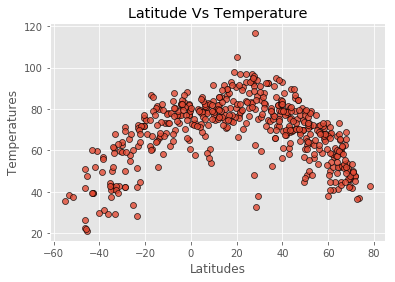

In [5]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
my_scatter_plot=ax.scatter(
latitudes,  # x values
temperatures, # y values
edgecolor="black",
linewidth=0.75,
alpha=0.80)

ax.set_xlabel("Latitudes")
ax.set_ylabel("Temperatures")
ax.set_title("Latitude Vs Temperature")


Text(0.5,1,'Latitude Vs Humidities')

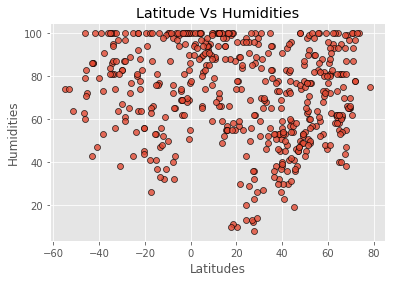

In [6]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
my_scatter_plot=ax.scatter(
latitudes,  # x values
humidities, # y values
edgecolor="black",
linewidth=0.75,
alpha=0.80)

ax.set_xlabel("Latitudes")
ax.set_ylabel("Humidities")
ax.set_title("Latitude Vs Humidities")


Text(0.5,1,'Latitude Vs Cloudiness')

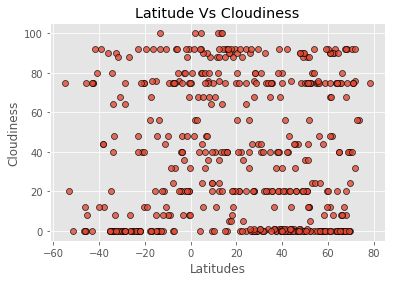

In [7]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
my_scatter_plot=ax.scatter(
latitudes,  # x values
cloudiness, # y values
edgecolor="black",
linewidth=0.75,
alpha=0.80)

ax.set_xlabel("Latitudes")
ax.set_ylabel("Cloudiness")
ax.set_title("Latitude Vs Cloudiness")


Text(0.5,1,'Latitude Vs Windspeeds')

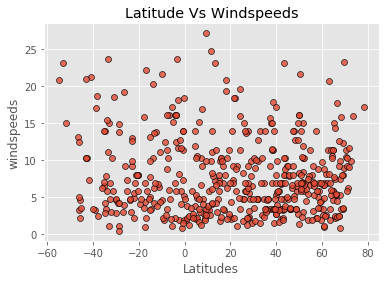

In [8]:
plt.style.use("ggplot")
fig, ax = plt.subplots()
my_scatter_plot=ax.scatter(
latitudes,  # x values
windspeeds, # y values
edgecolor="black",
linewidth=0.75,
alpha=0.80)

ax.set_xlabel("Latitudes")
ax.set_ylabel("windspeeds")
ax.set_title("Latitude Vs Windspeeds")


#   conclusions
 In terms of temperatures : at about +20 deg = 20 deg North of the equator is the hottest area
 In terms of humidity from the scatter plot shows humidity is high from -20 deg to +20 deg ..i.e-
     20deg South of the equator and 20 deg North of the equator 
 In terks of cloudiness: there is less cloud coverage 20 deg north of the equator
 In terms of wind speed , eventhough there are out-liers, wind speed is almost average around the equator
 
 